#TASK #1: PROBLEM STATEMENT AND PROJECT OVERVIEW

![alt text](https://drive.google.com/uc?id=1qOZKOEs_N-SbkO2vqlsxpXfHAqjZLw1p)

#TASK #2: IMPORT DATASETS AND LIBRARIES

In [1]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import copy
from scipy import stats

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

sns.set_style('darkgrid')
%matplotlib inline

In [3]:
# Read the stock data csv file, here's the list of the stocks considered:

# AAPL = Apple Stock 
# BA = Boeing 
# T = AT&T
# MGM = MGM Resorts International (Hotel Industry)
# AMZN = Amazon
# IBM = IBM
# TSLA = Tesla Motors
# GOOG = Google 
# sp500 = US Stock Market (S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on U.S. stock exchange)
# Check the list of S&P 500 companies here: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

stock_df = pd.read_csv('/content/drive/My Drive/Data Science Course/Python & ML in Finance/Part 2. Financial Analysis in Python/stock.csv')
stock_df

Date        AAPL          BA  ...         TSLA         GOOG        sp500
0     2012-01-12   60.198570   75.510002  ...    28.250000   313.644379  1295.500000
1     2012-01-13   59.972858   74.599998  ...    22.790001   311.328064  1289.089966
2     2012-01-17   60.671429   75.239998  ...    26.600000   313.116364  1293.670044
3     2012-01-18   61.301430   75.059998  ...    26.809999   315.273285  1308.040039
4     2012-01-19   61.107143   75.559998  ...    26.760000   318.590851  1314.500000
...          ...         ...         ...  ...          ...          ...          ...
2154  2020-08-05  440.250000  174.279999  ...  1485.020020  1473.609985  3327.770020
2155  2020-08-06  455.609985  172.199997  ...  1489.579956  1500.099976  3349.159912
2156  2020-08-07  444.450012  170.020004  ...  1452.709961  1494.489990  3351.280029
2157  2020-08-10  450.910004  179.410004  ...  1418.569946  1496.099976  3360.469971
2158  2020-08-11  437.500000  180.130005  ...  1374.390015  1480.319946  3333.689941

[2159 rows x 10 columns]

In [4]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 168.8+ KB


In [5]:
# Sort the stock data by date
stock_df = stock_df.sort_values('Date')
stock_df

Date        AAPL          BA  ...         TSLA         GOOG        sp500
0     2012-01-12   60.198570   75.510002  ...    28.250000   313.644379  1295.500000
1     2012-01-13   59.972858   74.599998  ...    22.790001   311.328064  1289.089966
2     2012-01-17   60.671429   75.239998  ...    26.600000   313.116364  1293.670044
3     2012-01-18   61.301430   75.059998  ...    26.809999   315.273285  1308.040039
4     2012-01-19   61.107143   75.559998  ...    26.760000   318.590851  1314.500000
...          ...         ...         ...  ...          ...          ...          ...
2154  2020-08-05  440.250000  174.279999  ...  1485.020020  1473.609985  3327.770020
2155  2020-08-06  455.609985  172.199997  ...  1489.579956  1500.099976  3349.159912
2156  2020-08-07  444.450012  170.020004  ...  1452.709961  1494.489990  3351.280029
2157  2020-08-10  450.910004  179.410004  ...  1418.569946  1496.099976  3360.469971
2158  2020-08-11  437.500000  180.130005  ...  1374.390015  1480.319946  3333.689941

[2159 rows x 10 columns]

In [6]:
# Print out the number of stocks
ls = stock_df.columns[1:]
print(f'Total Number of Stock : {len(ls)}')

Total Number of Stock : 9


In [7]:
# Print the name of stocks
ln = stock_df.columns[1:]
for n in ln:
  print(n)

AAPL
BA
T
MGM
AMZN
IBM
TSLA
GOOG
sp500


**MINI CHALLENGE #1:** 
- **What is the average return of the S&P500?**
- **Which stock or index has the minimum dispertion from the mean in dollar value?**
- **What is the maximum price for AMZN stock over the specified time period?** 

In [8]:
res = stock_df['sp500'].mean()
print(f'Average return of S&P500 : {res}')

Average return of S&P500 : 2218.7495540592877


In [9]:
stock_df.std().sort_values()

T          3.207490
MGM        6.963847
IBM       25.561938
AAPL      70.827601
BA       103.678586
TSLA     210.988003
GOOG     334.448057
sp500    537.321727
AMZN     697.838905
dtype: float64

In [10]:
stock_df['AMZN'].max()

3225.0

In [11]:
stock_df.describe()

AAPL           BA  ...         GOOG        sp500
count  2159.000000  2159.000000  ...  2159.000000  2159.000000
mean    140.819823   189.942700  ...   783.712512  2218.749554
std      70.827601   103.678586  ...   334.448057   537.321727
min      55.790001    67.239998  ...   278.481171  1278.040039
25%      89.165714   124.015000  ...   527.214416  1847.984985
50%     116.599998   142.419998  ...   737.599976  2106.629883
75%     175.019997   297.044998  ...  1079.744995  2705.810059
max     455.609985   440.619995  ...  1568.489990  3386.149902

[8 rows x 9 columns]

# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [12]:
# Check if data contains any null values
stock_df.isnull().sum()

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [13]:
# Getting dataframe info
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [14]:
# Define a function to plot the entire dataframe
# The function takes in a dataframe df as an input argument and does not return anything back!
# The function performs data visualization
# Pandas works great with matplotlib, you can simply plot data directly from a Pandas DataFrame using plot() method
def plotting (df, title):
  plt.figure(figsize=(15,7))
  plt.title(title, fontdict={'fontsize':12, 'fontweight':'bold'})
  for s in df.columns[1:]:
    plt.plot(df['Date'], df[s])


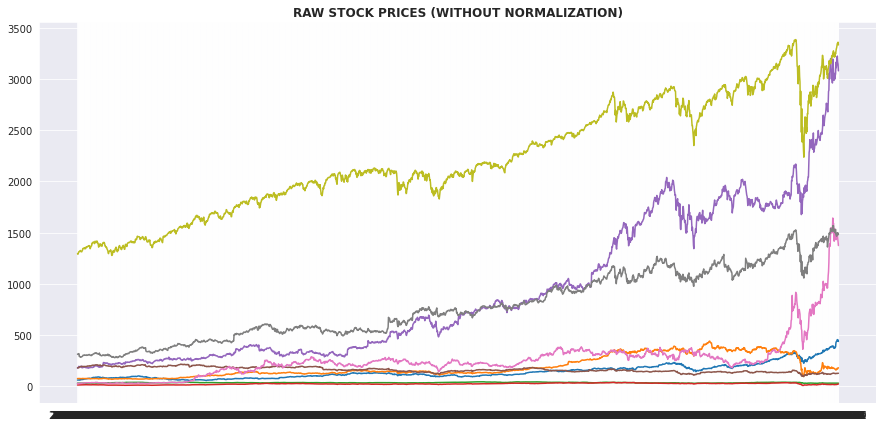

In [15]:
plotting(stock_df, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

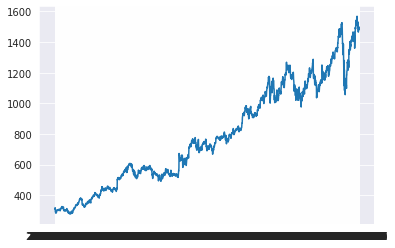

In [16]:
plt.plot(stock_df['Date'], stock_df['GOOG'])

In [17]:
# Second Way
def show_plot(df, fig_title):
  df.plot(x = 'Date', figsize = (15,7), linewidth = 3, title = fig_title)
  # plt.grid()
  plt.show()

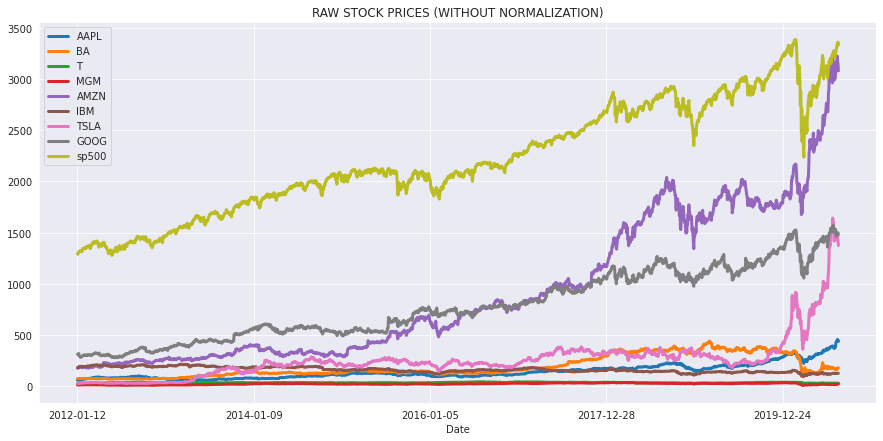

In [18]:
# Plot the data
show_plot(stock_df, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

**MINI CHALLENGE #2:**
- **Print out normalized (scaled) stock prices**  


In [19]:
stock_df['GOOG'][0]

313.644379

In [20]:
def norm (df):
  dc = df.copy()
  for d in dc.columns[1:]:
    dc[d] = dc[d] / dc[d][0]
  return dc

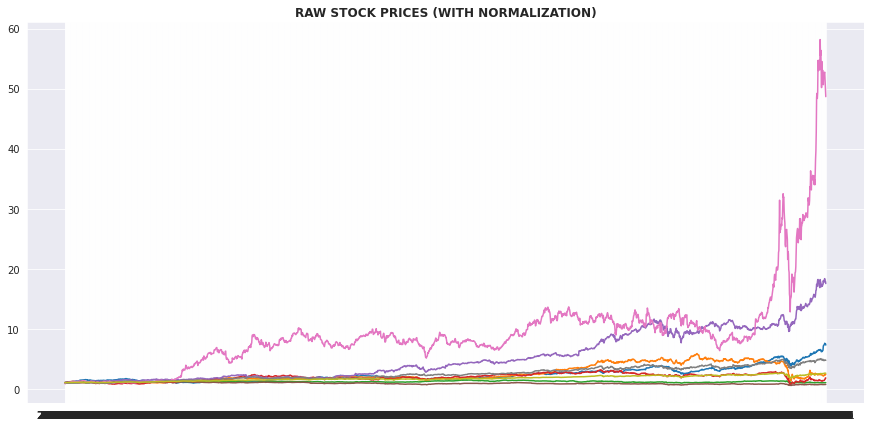

In [21]:
plotting(norm(stock_df), 'RAW STOCK PRICES (WITH NORMALIZATION)')

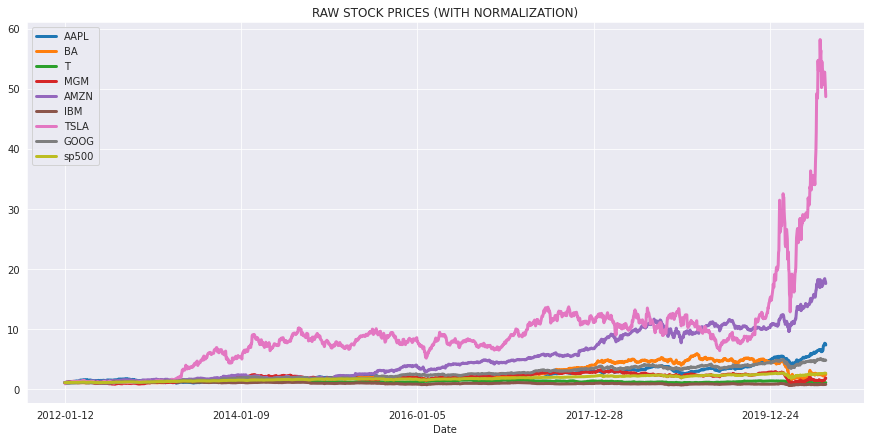

In [22]:
show_plot(norm(stock_df), 'RAW STOCK PRICES (WITH NORMALIZATION)')

# TASK #4: PERFORM INTERACTIVE DATA VISUALIZATION

In [23]:
# Function to perform an interactive data plotting using plotly express
# Plotly.express module which is imported as px includes functions that can plot interactive plots easily and effectively. 
# Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure instance. 

def interactive_plot (df, title):
  fig = px.line(title=title)

  for i in df.columns[1:]:
    fig.add_scatter(x=df['Date'], y=df[i], name=i)
  fig.show()

In [24]:
# Plot interactive chart
interactive_plot(stock_df, 'Prices')

**MINI CHALLENGE #3:**
- **Plot normalized stock data in an interactive way**
- **It seems that most stocks experienced massive drops in 2020, let's assume that you own 100 shares of the S&P500 and you bought them on Feb 19th, 2020. How much did you lose (in $) by March 23rd, 2020?**


In [25]:
interactive_plot(norm(stock_df), 'Prices')

In [26]:
# Net loss 
loss = 3386.15 - 2237.4 
total = loss * 100
print(loss)
print(total)

1148.75
114875.0


# TASK #5: CALCULATE INDIVIDUAL STOCKS DAILY RETURNS

In [27]:
# Let's calculate daily return for a single security
# Let's take the S&P500 as an example first
sp = stock_df['sp500']
sp_daily_return = sp.copy()

for i in range(1,len(sp)):
  sp_daily_return[i] = round((sp[i]-sp[i-1]) / sp[i-1] *100, 3)

sp_daily_return[0] = 0
sp_daily_return

0       0.000
1      -0.495
2       0.355
3       1.111
4       0.494
        ...  
2154    0.643
2155    0.643
2156    0.063
2157    0.274
2158   -0.797
Name: sp500, Length: 2159, dtype: float64

**MINI CHALLENGE #4:**
- **Calculate the daily return for Amazon stock.**


In [28]:
amzn = stock_df['AMZN']
amzn_daily_return = amzn.copy()

for i in range(1,len(amzn)):
  amzn_daily_return[i] = round((amzn[i]-amzn[i-1]) / amzn[i-1] * 100, 3)

amzn_daily_return[0] = 0
amzn_daily_return

0       0.000
1       1.415
2       1.816
3       4.283
4       2.645
        ...  
2154    2.109
2155    0.623
2156   -1.784
2157   -0.609
2158   -2.144
Name: AMZN, Length: 2159, dtype: float64

# TASK #6: CALCULATE MULTIPLE STOCKS DAILY RETURNS

In [29]:
# Let's define a function to calculate stocks daily returns (for all stocks) 
def daily_return (df):
  df_daily_return = df.copy()

  for c in df.columns[1:]:
    for i in range(1,len(df)):
      df_daily_return[c][i] = (df[c][i] - df[c][i-1]) / df[c][i-1] * 100
  
    df_daily_return[c][0] = 0

  return df_daily_return


In [30]:
# Get the daily returns 
daily_return(stock_df)

Date      AAPL        BA  ...       TSLA      GOOG     sp500
0     2012-01-12  0.000000  0.000000  ...   0.000000  0.000000  0.000000
1     2012-01-13 -0.374946 -1.205144  ... -19.327430 -0.738516 -0.494792
2     2012-01-17  1.164812  0.857909  ...  16.717854  0.574410  0.355295
3     2012-01-18  1.038382 -0.239234  ...   0.789470  0.688856  1.110793
4     2012-01-19 -0.316937  0.666134  ...  -0.186494  1.052283  0.493866
...          ...       ...       ...  ...        ...       ...       ...
2154  2020-08-05  0.362467  5.579446  ...  -0.133153  0.589774  0.642974
2155  2020-08-06  3.488923 -1.193483  ...   0.307062  1.797626  0.642770
2156  2020-08-07 -2.449458 -1.265966  ...  -2.475194 -0.373974  0.063303
2157  2020-08-10  1.453480  5.522880  ...  -2.350092  0.107728  0.274222
2158  2020-08-11 -2.973987  0.401316  ...  -3.114399 -1.054744 -0.796913

[2159 rows x 10 columns]

**MINI CHALLENGE #5:**
- **Plot the returns vs. time using both static and interactive plots**
- **What is the maximum daily return in % values**

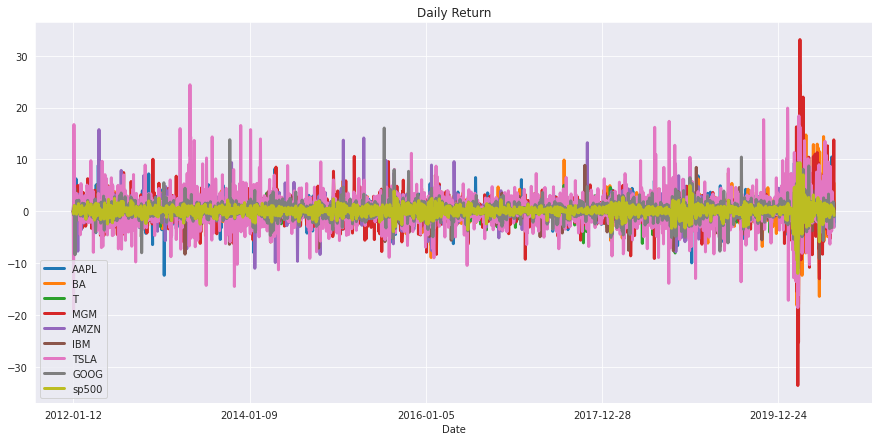

In [31]:
df_return = daily_return(stock_df)
df_return.plot(x='Date', figsize = (15,7), linewidth = 3, title = 'Daily Return')
plt.show()

In [32]:
interactive_plot(df_return, 'STOCKS DAILY RETURNS')

# TASK #7: CALCULATE THE CORRELATIONS BETWEEN DAILY RETURNS 

In [33]:
# Daily Return Correlation
df_corr = df_return.drop('Date',axis=1).corr()
df_corr

AAPL        BA         T  ...      TSLA      GOOG     sp500
AAPL   1.000000  0.385250  0.341373  ...  0.288535  0.509125  0.657321
BA     0.385250  1.000000  0.401602  ...  0.250946  0.388048  0.641826
T      0.341373  0.401602  1.000000  ...  0.152515  0.353695  0.617463
MGM    0.384089  0.554229  0.340166  ...  0.311879  0.439142  0.631449
AMZN   0.410234  0.267466  0.233145  ...  0.310084  0.575284  0.539560
IBM    0.434534  0.479264  0.484219  ...  0.245609  0.458816  0.703935
TSLA   0.288535  0.250946  0.152515  ...  1.000000  0.322805  0.387921
GOOG   0.509125  0.388048  0.353695  ...  0.322805  1.000000  0.684572
sp500  0.657321  0.641826  0.617463  ...  0.387921  0.684572  1.000000

[9 rows x 9 columns]

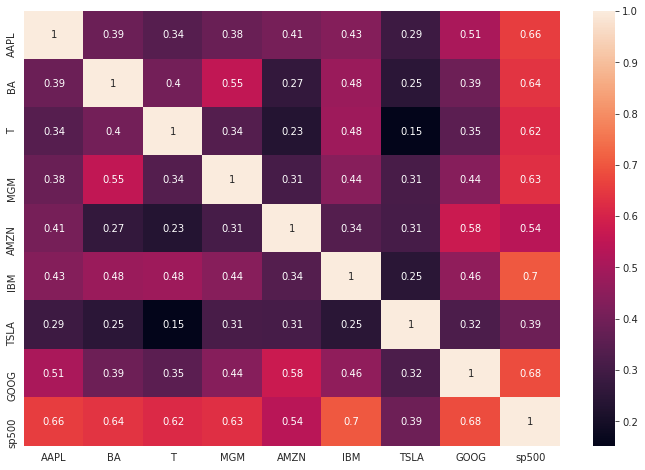

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(df_return.drop('Date',axis=1).corr(), annot=True)

**MINI CHALLENGE #6:**
- **What are the top 2 stocks that are positively correlated with the S&P500?**
- **What is the correlation between Amazon and Boeing? Comment on your answer**
- **What is the correlation between MGM and Boeing? Comment on your answer**

In [35]:
# Answer



1. Strong positive correlation between S&P500 and Google 
2. Strong positive correlation between S&P500 and IBM
3. Almost no correlation between Amazon and Beoing - totally different sectors
4. Some correlation exists between MGM and Boeing (Hotel and Airlines)

# TASK #8: PLOT THE HISTOGRAM FOR DAILY RETURNS

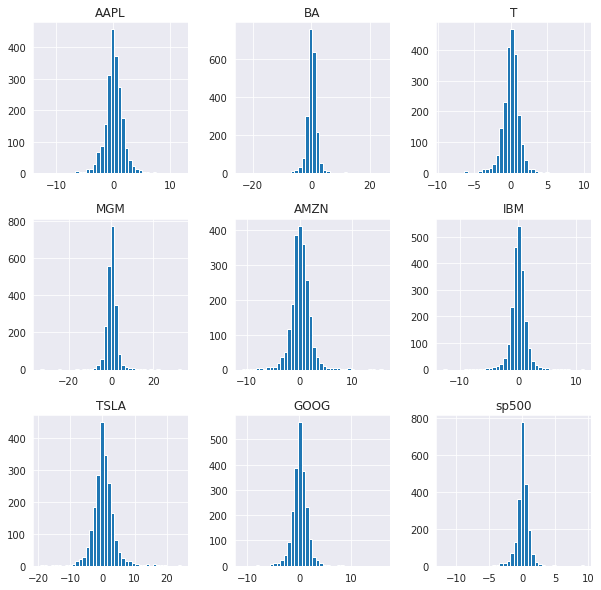

In [36]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 
# Notice how Tesla Standard deviation is high indicating a more volatile stock
df_return.hist(figsize=(10, 10), bins = 40);

**MINI CHALLENGE #7:**
- **Based on the histogram, which of the following stocks are more risky? T or TSLA**

In [37]:
df_return['TSLA'].std()

3.4300256177308173

In [38]:
print(df_return['TSLA'].std())
print(df_return['T'].std())
# Tesla standard deviation is much larger compared to T indicating a more risky security

3.4300256177308173
1.264851995196739


In [39]:
# Group all data returns together in a list
# Make a copy of the daily returns dataframe

df_hist = df_return.copy()

# Drop the date
df_hist = df_hist.drop(columns = ['Date'])

# Loop through every column
data = []

for i in df_hist.columns:
  data.append(df_return[i].values)
data

[array([ 0.        , -0.37494578,  1.16481192, ..., -2.44945751,
         1.45347999, -2.9739868 ]),
 array([ 0.        , -1.20514366,  0.85790887, ..., -1.26596576,
         5.52287953,  0.40131597]),
 array([ 0.        , -0.16600597,  0.59860326, ...,  0.60321716,
         0.5996036 ,  0.        ]),
 array([ 0.        ,  1.81368508, -0.8097166 , ...,  3.08776831,
        13.76772918, -0.69284065]),
 array([ 0.        ,  1.41533854,  1.8159433 , ..., -1.78418726,
        -0.60932259, -2.14379167]),
 array([ 0.        , -0.76986928,  0.46885241, ..., -0.91976211,
         1.72055219, -0.28322004]),
 array([  0.        , -19.32743009,  16.71785359, ...,  -2.47519409,
         -2.35009162,  -3.1143992 ]),
 array([ 0.        , -0.73851634,  0.57441015, ..., -0.37397414,
         0.10772812, -1.05474435]),
 array([ 0.        , -0.49479228,  0.35529545, ...,  0.06330295,
         0.27422185, -0.79691324])]

In [40]:
# Plotly's Python API contains a super pwerful module known as figure factory module 
# Figure factory module includes wrapper functions that create unique chart types such as interactive subplots 
# Check this out for more information: https://plotly.com/python/figure-factory-subplots/
# Notice how Boeing, Tesla and MGM gains are losses are sometimes extreme! This will indicate a more risky investment and will be quantified later using Sharpe Ratio
fig = ff.create_distplot(data, df_hist.columns)
fig.show()

# EXCELLENT JOB!

# **MINI CHALLENGE SOLUTIONS**

**MINI CHALLENGE #1 SOLUTION:** 
- **What is the average return of the S&P500?**
- **What is the maximum price for AMZN stock over the specified time period?** 

In [42]:
# Get the mean values
stock_df.mean()

AAPL      140.819823
BA        189.942700
T          35.162899
MGM        23.105743
AMZN      915.665665
IBM       161.853001
TSLA      259.600815
GOOG      783.712512
sp500    2218.749554
dtype: float64

In [43]:
# Get the standard deviation of stocks (Volatility)
stock_df.std()

AAPL      70.827601
BA       103.678586
T          3.207490
MGM        6.963847
AMZN     697.838905
IBM       25.561938
TSLA     210.988003
GOOG     334.448057
sp500    537.321727
dtype: float64

In [44]:
# Statistical data of the dataframe
stock_df.describe()

AAPL           BA  ...         GOOG        sp500
count  2159.000000  2159.000000  ...  2159.000000  2159.000000
mean    140.819823   189.942700  ...   783.712512  2218.749554
std      70.827601   103.678586  ...   334.448057   537.321727
min      55.790001    67.239998  ...   278.481171  1278.040039
25%      89.165714   124.015000  ...   527.214416  1847.984985
50%     116.599998   142.419998  ...   737.599976  2106.629883
75%     175.019997   297.044998  ...  1079.744995  2705.810059
max     455.609985   440.619995  ...  1568.489990  3386.149902

[8 rows x 9 columns]

**MINI CHALLENGE #2 SOLUTION:**
- **Print out normalized (scaled) stock prices**  


In [46]:
# Function to normalize the prices based on the initial price
# The function simply divides every stock by it's price at the start date (i.e.: Date = 2012-01-12)	
def normalize(df):
  x = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

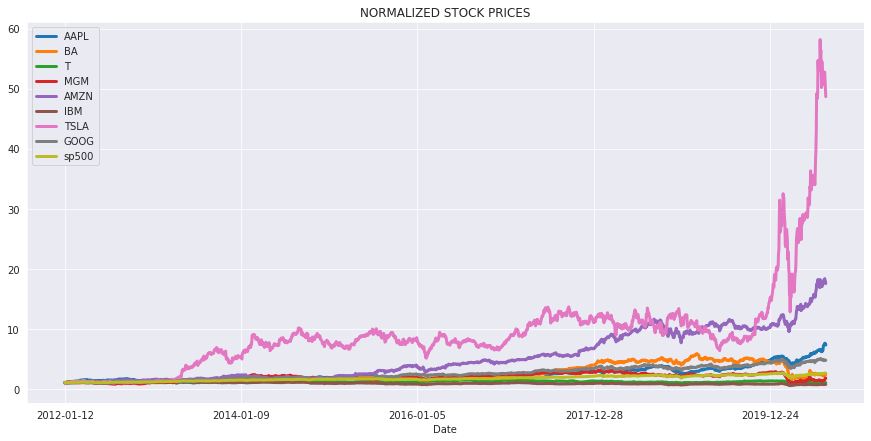

In [47]:
# Plot normalized data
# Notice the massive gains in Tesla Stock compared to Amazon (second place)
show_plot(normalize(stock_df), 'NORMALIZED STOCK PRICES')

**MINI CHALLENGE #3 SOLUTION:**
- **Plot normalized stock data in an interactive way**
- **It seems that most stocks experienced massive drops in 2020, let's assume that you own 100 shares of the S&P500 and you bought them on Feb 19th, 2020. How much did you lose (in $) by March 23rd, 2020?**


In [48]:
# Plot normalized interactive chart
interactive_plot(normalize(stock_df), 'Normalized Prices')

In [49]:
# S&P500 dropped from $3386.15 on Feb 19th, 2020 to $2237.4 by March 23rd, 2020 
# Net loss = $3386.15 - $2237.4 = $1148.75

**MINI CHALLENGE #4 SOLUTION:**
- **Calculate the daily return for Amazon stock.**


In [50]:
df = stock_df['AMZN']

**MINI CHALLENGE #5 SOLUTION:**
- **Plot the returns vs. time using both static and interactive plots**
- **What is the maximum daily return in % values**

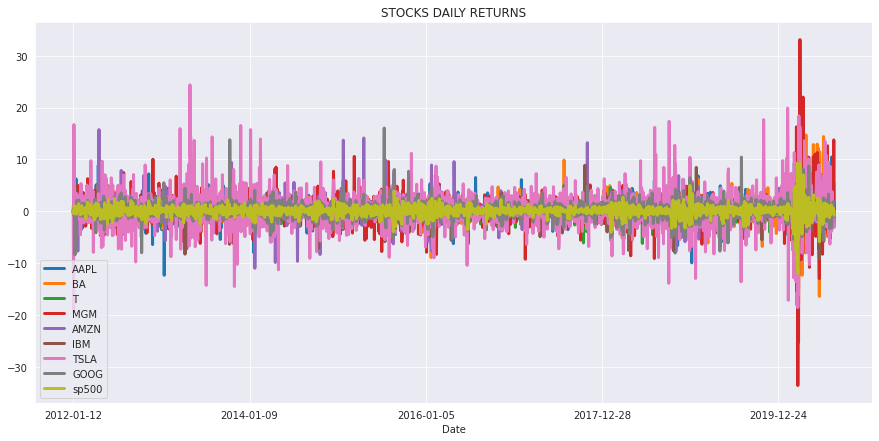

In [51]:
# Plot the daily returns
# Notice huge drops in MGM around March 2020 (Pandemic effect)
show_plot(df_return, 'STOCKS DAILY RETURNS')

In [52]:
# Plot the interactive chart
# Zoom in to view the sharp decline during March 2020
interactive_plot(df_return, 'STOCKS DAILY RETURNS')

**MINI CHALLENGE #6 SOLUTION:**
- **What are the top 2 stocks that are positively correlated with the S&P500?**
- **What is the correlation between Amazon and Boeing? Comment on your answer**
- **What is the correlation between MGM and Boeing? Comment on your answer**

In [ ]:
# Strong positive correlation between S&P500 and Google 
# Strong positive correlation between S&P500 and IBM
# Almost no correlation between Amazon and Beoing - totally different sectors
# Some correlation exists between MGM and Boeing (Hotel and Airlines)

**MINI CHALLENGE #7 SOLUTION:**
- **Based on the histogram, which of the following stocks are more risky? T or TSLA**

In [ ]:
# Tesla standard deviation is much larger compared to T indicating a more risky security